In [1]:
import sys
import os
import numpy as np
import multiprocessing
import dill
import matplotlib.pyplot as plt
import pandas as pd

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path + "/../src/simulations_v2")
    sys.path.append(module_path + "/..")
from load_params import load_params

from multi_group_simulation import MultiGroupSimulation

In [2]:
from util_functions import *
from uncertainty_analysis import *
from sim_helper_functions import *

In [3]:
prior_sim_files = []
for i in range(200):
    fname = '/home/aaj54/group-testing/notebooks/pnas_paper_figs/prior_sims/timestamp_1621828264/prior_{}.dill'.format(i)
    prior_sim_files.append(fname)

prior_data = load_sim_output(prior_sim_files)
prior_data

,asymp_prob_mult,inital_prev_mult,R0,outside_inf_mult,daily_self_report_prob,ct_mult,ct_testing_ratio,test_sensitivity,test_noncompliance,E_time,...,res_cornell_inf_90,res_ithaca_inf_10,res_ithaca_inf_50,res_ithaca_inf_90,vir_cornell_inf_10,vir_cornell_inf_50,vir_cornell_inf_90,vir_ithaca_inf_10,vir_ithaca_inf_50,vir_ithaca_inf_90
0,1.105403,1.027147,3.639263,1.164544,0.223732,1.788490,1.141808,0.610485,0.128067,1.588502,...,477.7,262.9,303.5,348.0,6466.0,6647.0,6896.1,3470.7,3724.0,3986.5
1,1.034458,0.934665,1.426772,1.018528,0.466081,1.836050,0.816283,0.653479,0.137818,2.154963,...,125.4,136.0,150.0,163.2,129.8,186.5,252.4,161.0,174.0,194.3
2,1.119300,1.061253,3.057253,1.092259,0.321024,0.787352,0.733479,0.724924,0.123132,2.026480,...,664.7,246.0,299.0,363.0,7289.8,7488.0,7651.4,4786.8,5145.5,5350.6
3,0.831878,0.966304,1.747983,1.105153,0.410393,1.748110,0.911399,0.587266,0.118356,1.344632,...,159.4,152.9,168.5,182.3,172.1,245.0,330.0,195.8,221.5,245.0
4,0.798042,0.553348,2.608265,1.202193,0.354607,1.787774,1.255935,0.779187,0.110719,2.444074,...,150.3,150.9,163.5,184.1,126.0,168.5,224.3,165.8,187.0,209.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.978172,1.224422,1.051221,1.355805,0.222087,1.839923,1.003761,0.715986,0.086677,3.026787,...,141.2,179.8,196.0,212.4,155.5,190.5,242.5,213.0,233.5,259.3
196,0.573802,1.201498,2.347837,1.276204,0.435707,1.653757,1.027820,0.545983,0.070850,2.188369,...,204.4,182.8,207.5,222.2,164.2,218.0,276.1,213.8,234.5,261.1
197,0.804410,1.459066,2.057836,0.685738,0.417540,1.317804,1.228906,0.451050,0.093532,2.018916,...,199.8,152.9,168.5,187.4,343.3,621.0,1055.2,233.8,274.0,353.1
198,0.927828,0.737379,2.588087,0.706247,0.478736,1.502405,1.085930,0.615764,0.126489,1.683080,...,160.3,114.9,135.0,151.2,221.9,395.5,609.9,172.9,191.5,232.0


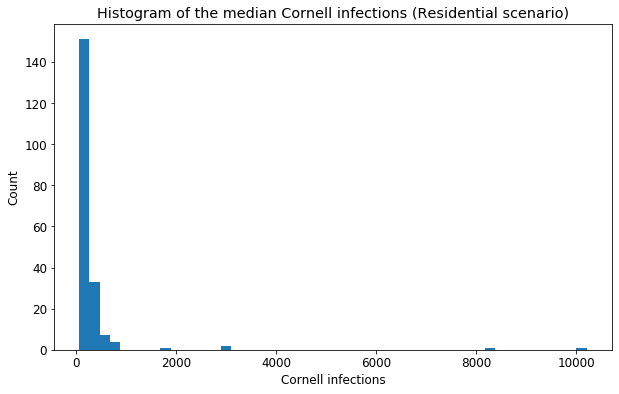

In [4]:
plt.figure(figsize=(10,6))
plt.hist(prior_data['res_cornell_inf_50'], bins=50)

plt.title('Histogram of the median Cornell infections (Residential scenario)')
plt.xlabel('Cornell infections')
plt.ylabel('Count')
plt.show()

In [5]:
[uncertainty_point, res_inf_matrix, res_hosp_matrix, virtual_inf_matrix, virtual_hosp_matrix] = dill.load(open('/home/aaj54/group-testing/notebooks/pnas_paper_figs/prior_sims/timestamp_1621828264/prior_0.dill','rb'))
res_inf_matrix, virtual_inf_matrix
# prior_data['res_cornell_inf_50'], prior_data['vir_cornell_inf_50']
# plt.figure(figsize=(10,6))
# plt.scatter(prior_data['res_cornell_inf_50'], prior_data['vir_cornell_inf_50'])
# plt.show()

([[86, 65, 33, 70, 30, 10, 37, 314],
  [77, 110, 22, 34, 40, 12, 38, 327],
  [93, 116, 17, 34, 38, 13, 19, 255],
  [120, 145, 29, 91, 49, 17, 21, 261],
  [65, 100, 25, 100, 53, 15, 31, 262],
  [44, 75, 29, 33, 37, 18, 24, 309],
  [86, 122, 41, 74, 53, 8, 28, 342],
  [65, 71, 34, 81, 41, 11, 26, 354],
  [68, 94, 33, 80, 43, 18, 23, 348],
  [66, 86, 55, 50, 47, 10, 30, 320],
  [60, 115, 21, 97, 44, 11, 18, 314],
  [63, 95, 37, 94, 47, 12, 21, 290],
  [93, 107, 28, 52, 45, 11, 31, 277],
  [44, 70, 21, 52, 26, 6, 31, 332],
  [107, 103, 40, 22, 40, 13, 34, 314],
  [53, 65, 33, 34, 31, 7, 30, 300],
  [130, 175, 35, 77, 51, 12, 15, 301],
  [86, 119, 28, 41, 48, 14, 26, 309],
  [89, 138, 24, 59, 52, 14, 19, 265],
  [61, 83, 33, 52, 44, 11, 30, 348],
  [104, 144, 37, 65, 64, 8, 28, 323],
  [58, 91, 22, 26, 28, 10, 21, 278],
  [43, 73, 31, 19, 35, 10, 22, 332],
  [82, 98, 18, 53, 35, 5, 30, 229],
  [87, 103, 30, 91, 58, 13, 30, 266],
  [49, 94, 25, 51, 32, 9, 21, 290],
  [86, 109, 27, 109, 53, 1

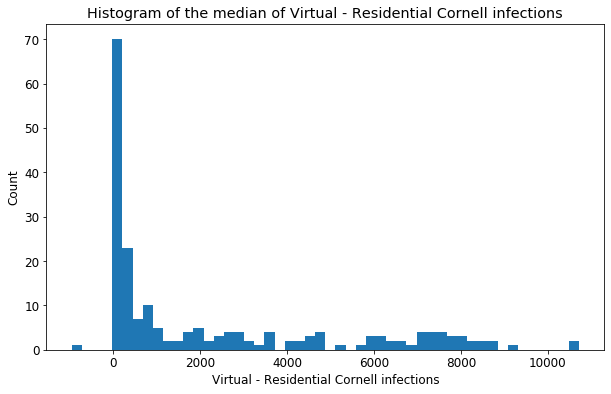

In [6]:
plt.figure(figsize=(10,6))
plt.hist(np.array(prior_data['vir_cornell_inf_50']) - np.array(prior_data['res_cornell_inf_50']), bins=50)

plt.title('Histogram of the median of Virtual - Residential Cornell infections')
plt.xlabel('Virtual - Residential Cornell infections')
plt.ylabel('Count')
plt.show()

In [24]:
# prior_data['color'] = ['blue' if prior_data['res_cornell_inf_50'] > prior_data['vir_cornell_inf_50'] else 'red']
# prior_data
# [if prior_data['res_cornell_inf_50'] > prior_data['vir_cornell_inf_50'] 'blue' else 'red']
# prior_data['res_cornell_inf_50'] > prior_data['vir_cornell_inf_50']
prior_data['color'] = np.where(prior_data['res_cornell_inf_50'] > prior_data['vir_cornell_inf_50'], 'red', 'blue')

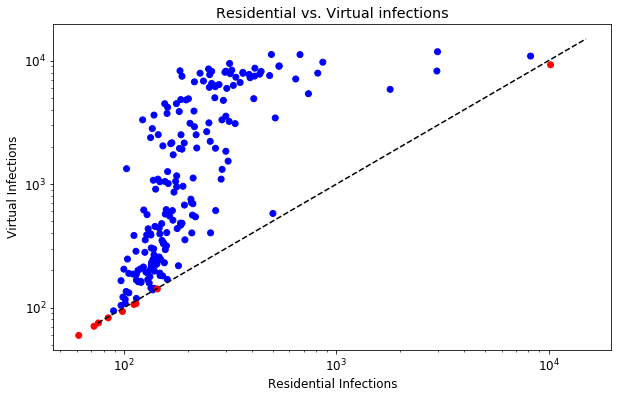

In [25]:
plt.figure(figsize=(10,6))
plt.scatter('res_cornell_inf_50', 'vir_cornell_inf_50', c='color', data=prior_data)
plt.plot(range(75,15000), range(75,15000), c='black', linestyle='dashed')
plt.xscale('log')
plt.yscale('log')

plt.title('Residential vs. Virtual infections')
plt.xlabel('Residential Infections')
plt.ylabel('Virtual Infections')

plt.show()